In [10]:
# Importar as bibliotecas
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [11]:
# Carregar os dados BTC-USD
btc = yf.Ticker("BTC-USD")
btc = btc.history(period="max")

In [12]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-30 00:00:00+00:00,30441.353516,31256.863281,29600.275391,30477.251953,26387306197,0.0,0.0
2023-07-01 00:00:00+00:00,30471.847656,30641.289062,30328.865234,30590.078125,9086606733,0.0,0.0
2023-07-02 00:00:00+00:00,30587.269531,30766.140625,30264.019531,30620.769531,10533418042,0.0,0.0


In [13]:
# Eliminar as colunas Dividends e Stock Splits
btc = btc.drop(columns=['Dividends', 'Stock Splits'])

<Axes: xlabel='Date'>

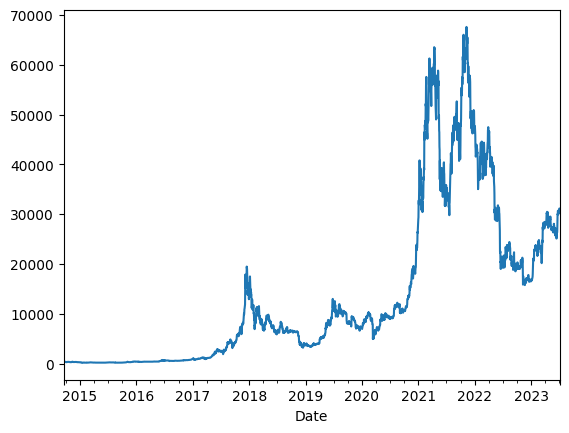

In [14]:
# Visualizar os dados
btc['Close'].plot()

In [15]:
# Dividir os dados em treino e teste
df_treino = btc.iloc[:int(.99*len(btc)), :]
df_teste = btc.iloc[int(.99*len(btc)):, :]

In [16]:
# Definir as variáveis independentes e dependentes
atributos = ['Open', 'Volume']
alvo = 'Close'

In [17]:
# Criar o modelo
modelo = xgb.XGBRegressor()

# Treinar o modelo
modelo.fit(df_treino[atributos], df_treino[alvo])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Fazer as previsões
previsoes = modelo.predict(df_teste[atributos])